# TASK5: Sales Prediction Using Python

Predicting the impact on sales of an organisation from various advertisement mediums like Telvision, Radio and Newspapers

Importing Libraries

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing the dataset

In [2]:
df=pd.read_csv("C:/Users/SOURADIPTO/Downloads/archive (11)\Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Checking the shape of dataset
df.shape

(200, 5)

In [4]:
# Checking the Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Droping unecessary column from the dataset
df = df.drop(columns="Unnamed: 0", axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
# Checking the stats about the dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#  Data Preprocessing

In [7]:
# Checking Null values in the dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
# Checking duplicated values 
df.duplicated().sum()

0

#  Exploratory Data Analysis

E:\Documents ibps\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TV', ylabel='Density'>

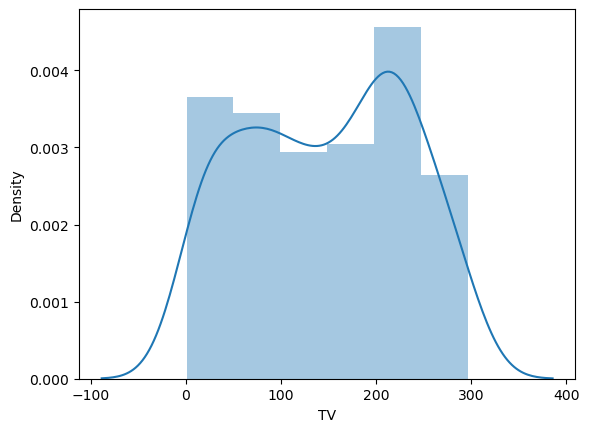

In [13]:
# numerical attributes visualization
sns.distplot(df["TV"])

E:\Documents ibps\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Radio', ylabel='Density'>

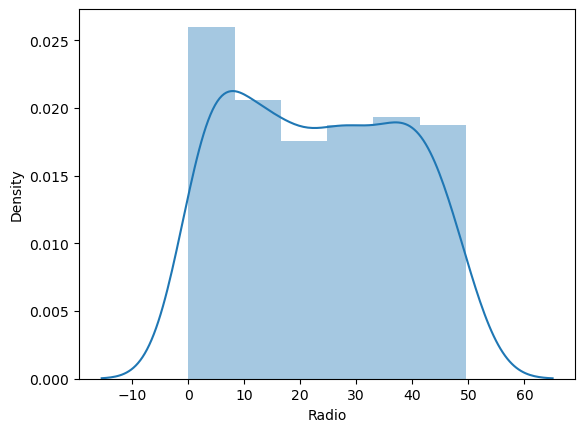

In [14]:
sns.distplot(df["Radio"])

E:\Documents ibps\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

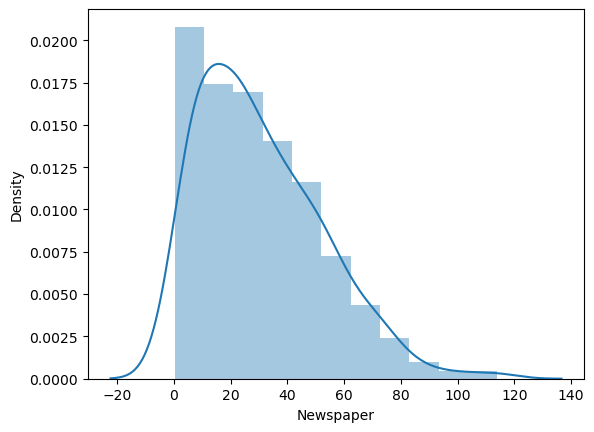

In [15]:
sns.distplot(df["Newspaper"])

E:\Documents ibps\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

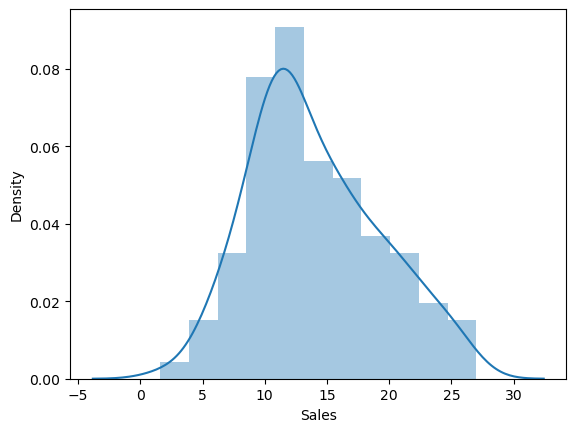

In [16]:
sns.distplot(df["Sales"])

# Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
X = df[['TV', 'Radio', 'Newspaper']] # Features
Y = df['Sales'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42) # Splitting the data into train and test data

# Model Training

# # Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [21]:
from sklearn import metrics

In [22]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [24]:
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8957008271017817


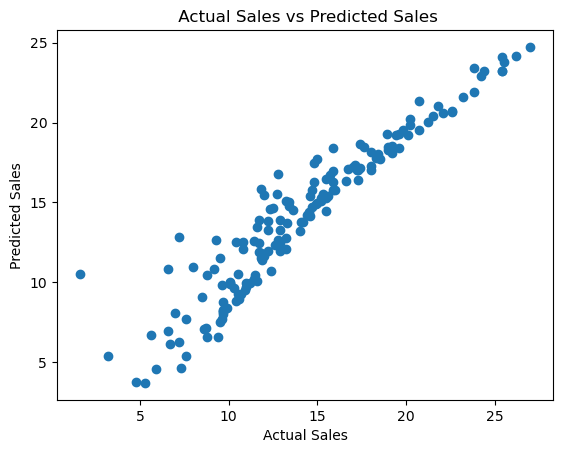

In [28]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(" Actual Sales vs Predicted Sales")
plt.show()

In [31]:
# prediction on Test data
test_data_prediction = lin_reg_model.predict(X_test)

In [32]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8994380241009121


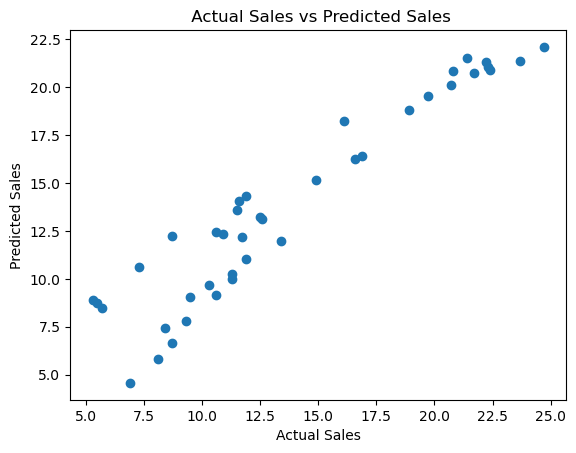

In [34]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title(" Actual Sales vs Predicted Sales")
plt.show()